### Comm Cases

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
import os
import sys
sys.path.insert(0,'/users/sgdbareh/volatile/ECHR_Importance')
import data_preprocessing_COMM as dpc
import json

data_directory = '/users/sgdbareh/volatile/ECHR_Importance/Art_3_Data/'

# Set the directory for the txt files
questions = data_directory +'corpora/communication_phase/questions/'
subject_matter = data_directory + 'corpora/communication_phase/subject_matter/'

df = dpc.data_2_df(questions, subject_matter)

df = dpc.preprocessing(df)

df = dpc.link_outcome_labels(df,label_file='./important_labels.csv',data_directory=data_directory)

df

,Filename,Questions,Subject Matter,appno,source_file,doc_date,importance,key_words_keys
0,001-109309,1. In the light of the applicants’ claims and ...,"The applicants, M.M., his wife and a minor chi...",72861/11,pruned_ADMISSIBILITY_meta.json,2013-09-03,4,350;444;609
1,001-109315,1. Did the applicant have a fair hearing in th...,"The applicant, Mr Aurelian Anghel, is a Romani...",5968/09,pruned_CHAMBER_meta.json,2013-06-25,4,445;40;7;451;425
2,001-109317,1. Has there been a violation of the applicant...,"The applicant, Mr Vladimirs Oderovs, is a Latv...",21979/08,pruned_COMMITTEE_meta.json,2017-06-15,4,451;424;429
3,001-109386,1. Has there been a violation of Article 6 § 1...,"1. The applicant, Mr Victor Sandu, is a Moldov...",16463/08,pruned_CHAMBER_meta.json,2014-02-11,3,445;76;136;14
4,001-109387,Has there been a violation of Article 3 of the...,"1. The applicant, Mr Sergiu Buhaniuc, is a Mol...",56074/10,pruned_CHAMBER_meta.json,2014-01-28,4,350;90;596;193
...,...,...,...,...,...,...,...,...
6990,001-229304,1. Has there been a violation of the applicant...,"The applicants are Italian nationals, living i...",54648/21,pruned_ADMISSIBILITYCOM_meta.json,2024-03-07,4,451;138
6991,001-229359,Has there been a violation of Article 5 § 3 of...,"The applicant’s pre-trial detention, which sta...",9573/23,pruned_ADMISSIBILITYCOM_meta.json,2024-03-21,4,448;138
6992,001-229708,Has the applicant suffered discrimination in t...,The application concerns the refusal to grant ...,19191/19,pruned_ADMISSIBILITYCOM_meta.json,2024-03-21,4,343;138
6993,001-229713,Has the applicant suffered a violation of Arti...,"By a judgment of 29 November 2016, the La Spez...",53715/20,pruned_ADMISSIBILITYCOM_meta.json,2024-03-21,4,445;138


In [3]:
#article 3 keywords
article3 = ['350','89','90','596','620','618','192','193','633','492']

In [4]:
# Load the .json file
with open('/users/sgdbareh/volatile/ECHR_Importance/Art_3_Data/key_labels.json') as f:
    json_data = json.load(f)

# Create a dictionary to map keyword labels to keywords
label_to_keyword = {label: keyword for label,keyword in json_data.items()}


In [5]:
df['key_words_keys'] = df['key_words_keys'].astype(str)

for i in range(len(df)):
    keys = df['key_words_keys'][i].split(';')
    keywords = []
    for key in keys:
        if key in label_to_keyword.keys():
            keywords.append(label_to_keyword[key])
        else: 
            pass
    if 'keywords' not in df.columns:
        df['keywords'] = ''
    df.at[i, 'keywords'] = keywords


In [6]:
df_2 = df[df['keywords'].apply(lambda x: len(x) > 0)]

In [7]:
df_2.head()

,Filename,Questions,Subject Matter,appno,source_file,doc_date,importance,key_words_keys,keywords
0,001-109309,1. In the light of the applicants’ claims and ...,"The applicants, M.M., his wife and a minor chi...",72861/11,pruned_ADMISSIBILITY_meta.json,2013-09-03,4,350;444;609,"[(Art. 3) Prohibition of torture, (Art. 13) Ri..."
1,001-109315,1. Did the applicant have a fair hearing in th...,"The applicant, Mr Aurelian Anghel, is a Romani...",5968/09,pruned_CHAMBER_meta.json,2013-06-25,4,445;40;7;451;425,"[(Art. 6) Right to a fair trial, (Art. 6) Civi..."
2,001-109317,1. Has there been a violation of the applicant...,"The applicant, Mr Vladimirs Oderovs, is a Latv...",21979/08,pruned_COMMITTEE_meta.json,2017-06-15,4,451;424;429,[(Art. 8) Right to respect for private and fam...
3,001-109386,1. Has there been a violation of Article 6 § 1...,"1. The applicant, Mr Victor Sandu, is a Moldov...",16463/08,pruned_CHAMBER_meta.json,2014-02-11,3,445;76;136;14,"[(Art. 6) Right to a fair trial, (Art. 6) Crim..."
4,001-109387,Has there been a violation of Article 3 of the...,"1. The applicant, Mr Sergiu Buhaniuc, is a Mol...",56074/10,pruned_CHAMBER_meta.json,2014-01-28,4,350;90;596;193,"[(Art. 3) Prohibition of torture, (Art. 3) Deg..."


In [8]:
df_2['keyword_num'] = df_2.apply(lambda x: x['key_words_keys'].split(';'), axis=1)

/tmp/ipykernel_225176/3226039370.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['keyword_num'] = df_2.apply(lambda x: x['key_words_keys'].split(';'), axis=1)


In [9]:
df_art_3 = df_2[df_2['keyword_num'].apply(lambda x: any(x in article3 for x in x))]

In [10]:
df_art_3['keywords_art_3'] = df_art_3['keyword_num'].apply(lambda x: [i for i in x if i in article3])

/tmp/ipykernel_225176/3969326210.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_art_3['keywords_art_3'] = df_art_3['keyword_num'].apply(lambda x: [i for i in x if i in article3])


In [11]:
df_art_3

,Filename,Questions,Subject Matter,appno,source_file,doc_date,importance,key_words_keys,keywords,keyword_num,keywords_art_3
0,001-109309,1. In the light of the applicants’ claims and ...,"The applicants, M.M., his wife and a minor chi...",72861/11,pruned_ADMISSIBILITY_meta.json,2013-09-03,4,350;444;609,"[(Art. 3) Prohibition of torture, (Art. 13) Ri...","[350, 444, 609]",[350]
4,001-109387,Has there been a violation of Article 3 of the...,"1. The applicant, Mr Sergiu Buhaniuc, is a Mol...",56074/10,pruned_CHAMBER_meta.json,2014-01-28,4,350;90;596;193,"[(Art. 3) Prohibition of torture, (Art. 3) Deg...","[350, 90, 596, 193]","[350, 90, 596, 193]"
5,001-109429,1. In the light of the applicant’s claims and ...,The applicant is a national of the Democratic ...,75972/11,pruned_ADMISSIBILITYCOM_meta.json,2014-10-14,4,350;444;609,"[(Art. 3) Prohibition of torture, (Art. 13) Ri...","[350, 444, 609]",[350]
12,001-109439,1. Taking into account the applicant’s medical...,"The applicant, Mr Telman Akopovich Mkhitaryan,...",46108/11,pruned_CHAMBER_meta.json,2013-02-05,4,350;90;193;448;227;474,"[(Art. 3) Prohibition of torture, (Art. 3) Deg...","[350, 90, 193, 448, 227, 474]","[350, 90, 193]"
13,001-109440,1. Did the applicant exhaust domestic remedies...,"The applicant, Mr Nikolay Nikolayevich Ryazano...",44885/06,pruned_ADMISSIBILITYCOM_meta.json,2021-10-19,4,350;448;445;451;444;14;369,"[(Art. 3) Prohibition of torture, (Art. 5) Rig...","[350, 448, 445, 451, 444, 14, 369]",[350]
...,...,...,...,...,...,...,...,...,...,...,...
6963,001-225422,1. Have the applicants been subjected to inhum...,The application concerns the applicant’s ill-t...,54009/21,pruned_ADMISSIBILITYCOM_meta.json,2023-10-12,4,350;138,"[(Art. 3) Prohibition of torture, (Art. 39) Fr...","[350, 138]",[350]
6966,001-225813,1. Has the applicant been subjected to inhuman...,The application concerns an incident that occu...,34039/22,pruned_ADMISSIBILITYCOM_meta.json,2024-02-15,4,350;138,"[(Art. 3) Prohibition of torture, (Art. 39) Fr...","[350, 138]",[350]
6976,001-226519,Was the confinement of the applicant to a rest...,The application concerns the applicant’s confi...,26597/23,pruned_ADMISSIBILITYCOM_meta.json,2024-04-04,4,350;138,"[(Art. 3) Prohibition of torture, (Art. 39) Fr...","[350, 138]",[350]
6978,001-227690,1. Did the material conditions of the applican...,The application concerns the conditions of det...,22144/23,pruned_ADMISSIBILITYCOM_meta.json,2024-04-04,4,444;138;350,"[(Art. 13) Right to an effective remedy, (Art....","[444, 138, 350]",[350]


In [12]:
df_art_3['keywords_art_3_text'] = df_art_3['keywords_art_3'].apply(lambda x: ', '.join([label_to_keyword[key] for key in x if key in label_to_keyword.keys()]))


/tmp/ipykernel_225176/2104580476.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_art_3['keywords_art_3_text'] = df_art_3['keywords_art_3'].apply(lambda x: ', '.join([label_to_keyword[key] for key in x if key in label_to_keyword.keys()]))


In [13]:
df_art_3.columns

Index(['Filename', 'Questions', 'Subject Matter', 'appno', 'source_file',
       'doc_date', 'importance', 'key_words_keys', 'keywords', 'keyword_num',
       'keywords_art_3', 'keywords_art_3_text'],
      dtype='object')

In [14]:
df_art_3 = df_art_3[['Filename', 'Questions', 'Subject Matter', 'appno','source_file','doc_date','importance','keywords_art_3','keywords_art_3_text']]

In [15]:
# Communicated cases data

df_art_3

,Filename,Questions,Subject Matter,appno,source_file,doc_date,importance,keywords_art_3,keywords_art_3_text
0,001-109309,1. In the light of the applicants’ claims and ...,"The applicants, M.M., his wife and a minor chi...",72861/11,pruned_ADMISSIBILITY_meta.json,2013-09-03,4,[350],(Art. 3) Prohibition of torture
4,001-109387,Has there been a violation of Article 3 of the...,"1. The applicant, Mr Sergiu Buhaniuc, is a Mol...",56074/10,pruned_CHAMBER_meta.json,2014-01-28,4,"[350, 90, 596, 193]","(Art. 3) Prohibition of torture, (Art. 3) Degr..."
5,001-109429,1. In the light of the applicant’s claims and ...,The applicant is a national of the Democratic ...,75972/11,pruned_ADMISSIBILITYCOM_meta.json,2014-10-14,4,[350],(Art. 3) Prohibition of torture
12,001-109439,1. Taking into account the applicant’s medical...,"The applicant, Mr Telman Akopovich Mkhitaryan,...",46108/11,pruned_CHAMBER_meta.json,2013-02-05,4,"[350, 90, 193]","(Art. 3) Prohibition of torture, (Art. 3) Degr..."
13,001-109440,1. Did the applicant exhaust domestic remedies...,"The applicant, Mr Nikolay Nikolayevich Ryazano...",44885/06,pruned_ADMISSIBILITYCOM_meta.json,2021-10-19,4,[350],(Art. 3) Prohibition of torture
...,...,...,...,...,...,...,...,...,...
6963,001-225422,1. Have the applicants been subjected to inhum...,The application concerns the applicant’s ill-t...,54009/21,pruned_ADMISSIBILITYCOM_meta.json,2023-10-12,4,[350],(Art. 3) Prohibition of torture
6966,001-225813,1. Has the applicant been subjected to inhuman...,The application concerns an incident that occu...,34039/22,pruned_ADMISSIBILITYCOM_meta.json,2024-02-15,4,[350],(Art. 3) Prohibition of torture
6976,001-226519,Was the confinement of the applicant to a rest...,The application concerns the applicant’s confi...,26597/23,pruned_ADMISSIBILITYCOM_meta.json,2024-04-04,4,[350],(Art. 3) Prohibition of torture
6978,001-227690,1. Did the material conditions of the applican...,The application concerns the conditions of det...,22144/23,pruned_ADMISSIBILITYCOM_meta.json,2024-04-04,4,[350],(Art. 3) Prohibition of torture


In [16]:
df_art_3['Subj_Count'] = df_art_3['Subject Matter'].str.split().str.len()

/tmp/ipykernel_225176/4232643394.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_art_3['Subj_Count'] = df_art_3['Subject Matter'].str.split().str.len()


In [17]:
df_art_3 = df_art_3[df_art_3['Subj_Count'] >= 50]

### Find cases cited in comm cases

In [3]:
comm_cases = pd.read_pickle('/users/sgdbareh/volatile/ECHR_Importance/Art_3_Data_Process/comm_cases.pkl')

In [4]:
outcome_cases = pd.read_pickle('/users/sgdbareh/volatile/ECHR_Importance/Art_3_Data_Process/outcome_cases.pkl')

In [5]:
metadata = pd.read_pickle('/users/sgdbareh/volatile/ECHR_Importance/Art_3_Data_Process/unfiltered_metadata.pkl')

In [6]:
len(comm_cases)

1379

In [7]:
outcome_cases.rename(columns={'File':'Filename'}, inplace=True)

In [8]:
metadata.rename(columns={'itemid':'Filename'}, inplace=True)

In [67]:
metadata.columns

Index(['Filename', 'appno', 'doctypebranch', 'respondent', 'decisiondate',
       'extractedappno', 'conclusion', 'importance', 'kpthesaurus',
       'judgementdate', 'doctype', 'kpdate', 'resolutiondate', 'application',
       'article', 'referencedate', 'publishedby', 'violation',
       'advopidentifier', 'nonviolation', 'separateopinion',
       'documentcollectionid2', 'isplaceholder', 'languagenumber',
       'typedescription', 'originatingbody', 'representedby',
       'introductiondate', 'reportdate', 'issue', 'meetingnumber',
       'languageisocode', 'externalsources', 'applicability',
       'resolutionnumber', 'appnoparts', 'scl', 'advopstatus', 'docname',
       'rulesofcourt', 'documentcollectionid', 'ecli', 'sclappnos', 'rank'],
      dtype='object')

In [36]:
new = pd.merge(comm_cases, metadata, on='appno', how='inner')

In [155]:
len(new)

2800

In [10]:
new.columns

Index(['Filename_x', 'Questions', 'Subject Matter', 'appno', 'source_file',
       'doc_date', 'importance_x', 'keywords_art_3', 'keywords_art_3_text',
       'Subj_Count', 'Filename_y', 'doctypebranch', 'respondent',
       'decisiondate', 'extractedappno', 'conclusion', 'importance_y',
       'kpthesaurus', 'judgementdate', 'doctype', 'kpdate', 'resolutiondate',
       'application', 'article', 'referencedate', 'publishedby', 'violation',
       'advopidentifier', 'nonviolation', 'separateopinion',
       'documentcollectionid2', 'isplaceholder', 'languagenumber',
       'typedescription', 'originatingbody', 'representedby',
       'introductiondate', 'reportdate', 'issue', 'meetingnumber',
       'languageisocode', 'externalsources', 'applicability',
       'resolutionnumber', 'appnoparts', 'scl', 'advopstatus', 'docname',
       'rulesofcourt', 'documentcollectionid', 'ecli', 'sclappnos', 'rank'],
      dtype='object')

In [75]:
metadata[metadata['Filename'] == '001-163508']['extractedappno']

61637    8685/15
Name: extractedappno, dtype: object

In [83]:
if 'DECISIONS' in new.iloc[1]['documentcollectionid']:
    print('yes')           

In [37]:
new.drop(new[new.apply(lambda x: 'COMMUNICATEDCASES' in x['documentcollectionid'], axis=1)].index, inplace=True)


In [157]:
len(new)

1391

In [38]:
new.iloc[0][['extractedappno','sclappnos','appno']]

extractedappno    72861/11;30696/09;57264/09
sclappnos                                   
appno                               72861/11
Name: 0, dtype: object

In [39]:
new = new.drop_duplicates(subset='appno', keep='last')

In [159]:
new['documentcollectionid'].unique()

array(['CASELAW;DECISIONS;ADMISSIBILITY;ENG',
       'CASELAW;JUDGMENTS;CHAMBER;ENG',
       'CASELAW;DECISIONS;ADMISSIBILITYCOM;ENG',
       'CASELAW;JUDGMENTS;COMMITTEE;ENG',
       'CASELAW;JUDGMENTS;GRANDCHAMBER;ENG',
       'CASELAW;DECISIONS;DECGRANDCHAMBER;ENG'], dtype=object)

In [160]:
new.columns

Index(['extractedappno', 'sclappnos', 'appno', 'documentcollectionid'], dtype='object')

In [164]:
new[['appno','Filename_x','extractedappno','documentcollectionid','languageisocode']]

,appno,Filename_x,extractedappno,documentcollectionid,languageisocode
0,72861/11,001-109309,72861/11;30696/09;57264/09,CASELAW;DECISIONS;ADMISSIBILITY;ENG,ENG
2,56074/10,001-109387,56074/10;18919/10;25803/94;26973/95;77617/01;4...,CASELAW;JUDGMENTS;CHAMBER;ENG,ENG
4,75972/11,001-109429,75972/11,CASELAW;DECISIONS;ADMISSIBILITYCOM;ENG,ENG
6,46108/11,001-109439,46108/11;61767/08;26772/95;7842/04;2346/02;302...,CASELAW;JUDGMENTS;CHAMBER;ENG,ENG
8,44885/06,001-109440,44885/06;1750/03;34636/09;13074/07;29462/95;21...,CASELAW;DECISIONS;ADMISSIBILITYCOM;ENG,ENG
...,...,...,...,...,...
2790,54009/21,001-225422,54009/21,CASELAW;DECISIONS;ADMISSIBILITYCOM;ENG,ENG
2792,34039/22,001-225813,34039/22,CASELAW;DECISIONS;ADMISSIBILITYCOM;ENG,ENG
2794,26597/23,001-226519,26597/23,CASELAW;DECISIONS;ADMISSIBILITYCOM;ENG,ENG
2796,22144/23,001-227690,22144/23,CASELAW;DECISIONS;ADMISSIBILITYCOM;ENG,ENG


In [165]:
len(new)

1374

In [40]:
new.loc[new['extractedappno'].isnull(), 'extractedappno'] = new['sclappnos']

In [14]:
new

,Filename_x,Questions,Subject Matter,appno,source_file,doc_date,importance_x,keywords_art_3,keywords_art_3_text,Subj_Count,...,resolutionnumber,appnoparts,scl,advopstatus,docname,rulesofcourt,documentcollectionid,ecli,sclappnos,rank
0,001-109309,1. In the light of the applicants’ claims and ...,"The applicants, M.M., his wife and a minor chi...",72861/11,pruned_ADMISSIBILITY_meta.json,2013-09-03,4,[350],(Art. 3) Prohibition of torture,912,...,,72861;11,,,M.M. AND OTHERS v. FINLAND,,CASELAW;DECISIONS;ADMISSIBILITY;ENG,ECLI:CE:ECHR:2013:0903DEC007286111,,133.53012
2,001-109387,Has there been a violation of Article 3 of the...,"1. The applicant, Mr Sergiu Buhaniuc, is a Mol...",56074/10,pruned_CHAMBER_meta.json,2014-01-28,4,"[350, 90, 596, 193]","(Art. 3) Prohibition of torture, (Art. 3) Degr...",784,...,,56074;10,,,CASE OF BUHANIUC v. THE REPUBLIC OF MOLDOVA,,CASELAW;JUDGMENTS;CHAMBER;ENG,ECLI:CE:ECHR:2014:0128JUD005607410,,136.07784
4,001-109429,1. In the light of the applicant’s claims and ...,The applicant is a national of the Democratic ...,75972/11,pruned_ADMISSIBILITYCOM_meta.json,2014-10-14,4,[350],(Art. 3) Prohibition of torture,479,...,,75972;11,,,T.B. v. POLAND,,CASELAW;DECISIONS;ADMISSIBILITYCOM;ENG,ECLI:CE:ECHR:2014:1014DEC007597211,,125.33682
6,001-109439,1. Taking into account the applicant’s medical...,"The applicant, Mr Telman Akopovich Mkhitaryan,...",46108/11,pruned_CHAMBER_meta.json,2013-02-05,4,"[350, 90, 193]","(Art. 3) Prohibition of torture, (Art. 3) Degr...",3400,...,,46108;11,,,CASE OF MKHITARYAN v. RUSSIA,,CASELAW;JUDGMENTS;CHAMBER;ENG,ECLI:CE:ECHR:2013:0205JUD004610811,,135.92229
8,001-109440,1. Did the applicant exhaust domestic remedies...,"The applicant, Mr Nikolay Nikolayevich Ryazano...",44885/06,pruned_ADMISSIBILITYCOM_meta.json,2021-10-19,4,[350],(Art. 3) Prohibition of torture,3957,...,,44885;06,,,RYAZANOV v. RUSSIA,,CASELAW;DECISIONS;ADMISSIBILITYCOM;ENG,ECLI:CE:ECHR:2021:1019DEC004488506,,129.28236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2790,001-225422,1. Have the applicants been subjected to inhum...,The application concerns the applicant’s ill-t...,54009/21,pruned_ADMISSIBILITYCOM_meta.json,2023-10-12,4,[350],(Art. 3) Prohibition of torture,148,...,,54009;21,,None,BAJČETIĆ v. MONTENEGRO,,CASELAW;DECISIONS;ADMISSIBILITYCOM;ENG,ECLI:CE:ECHR:2023:1012DEC005400921,None,146.42987
2792,001-225813,1. Has the applicant been subjected to inhuman...,The application concerns an incident that occu...,34039/22,pruned_ADMISSIBILITYCOM_meta.json,2024-02-15,4,[350],(Art. 3) Prohibition of torture,180,...,,34039;22,,None,HOFMAN v. THE NETHERLANDS,,CASELAW;DECISIONS;ADMISSIBILITYCOM;ENG,ECLI:CE:ECHR:2024:0215DEC003403922,None,164.79068
2794,001-226519,Was the confinement of the applicant to a rest...,The application concerns the applicant’s confi...,26597/23,pruned_ADMISSIBILITYCOM_meta.json,2024-04-04,4,[350],(Art. 3) Prohibition of torture,90,...,,26597;23,,None,AHMADI v. DENMARK,,CASELAW;DECISIONS;ADMISSIBILITYCOM;ENG,ECLI:CE:ECHR:2024:0404DEC002659723,None,182.69804
2796,001-227690,1. Did the material conditions of the applican...,The application concerns the conditions of det...,22144/23,pruned_ADMISSIBILITYCOM_meta.json,2024-04-04,4,[350],(Art. 3) Prohibition of torture,274,...,,22144;23,,None,TENEQEXHI v. GREECE,,CASELAW;DECISIONS;ADMISSIBILITYCOM;ENG,ECLI:CE:ECHR:2024:0404DEC002214423,None,182.69804


In [41]:
new.reset_index(drop=True, inplace=True)

In [16]:
len(new['extractedappno'].iloc[1])

107

In [42]:
new['extractedappno_list'] = new['extractedappno'].apply(lambda x: x.split(';'))

In [43]:
new['extractedappno_list']

0                          [72861/11, 30696/09, 57264/09]
1       [56074/10, 18919/10, 25803/94, 26973/95, 77617...
2                                              [75972/11]
3       [46108/11, 61767/08, 26772/95, 7842/04, 2346/0...
4       [44885/06, 1750/03, 34636/09, 13074/07, 29462/...
                              ...                        
1369                                           [54009/21]
1370                                           [34039/22]
1371                                           [26597/23]
1372                                           [22144/23]
1373                                           [19840/23]
Name: extractedappno_list, Length: 1374, dtype: object

In [44]:
new['extractedappno_list'] = new.apply(lambda row: [x for x in row['extractedappno_list'] if x != row['appno']], axis=1)

In [47]:
new.head(10)[['extractedappno_list','appno']]

,extractedappno_list,appno
0,"[30696/09, 57264/09]",72861/11
1,"[18919/10, 25803/94, 26973/95, 77617/01, 42066...",56074/10
2,[],75972/11
3,"[61767/08, 26772/95, 7842/04, 2346/02, 30210/9...",46108/11
4,"[1750/03, 34636/09, 13074/07, 29462/95, 21566/...",44885/06
5,"[59498/00, 28114/95, 35382/97]",11362/07
6,"[75788/01, 38833/03, 11160/07, 33234/07, 38435...",1870/05
7,"[27725/10, 286/98, 411/10, 40035/98, 1948/04, ...",53852/11
8,[],3658/10
9,"[3564/11, 41261/17, 61411/15, 71127/01, 33401/...",34168/11


In [48]:
new['extractedapplen'] = new['extractedappno_list'].apply(lambda x: len(x))

In [49]:
new[['extractedappno','appno','extractedapplen']]

,extractedappno,appno,extractedapplen
0,72861/11;30696/09;57264/09,72861/11,2
1,56074/10;18919/10;25803/94;26973/95;77617/01;4...,56074/10,11
2,75972/11,75972/11,0
3,46108/11;61767/08;26772/95;7842/04;2346/02;302...,46108/11,33
4,44885/06;1750/03;34636/09;13074/07;29462/95;21...,44885/06,12
...,...,...,...
1369,54009/21,54009/21,0
1370,34039/22,34039/22,0
1371,26597/23,26597/23,0
1372,22144/23,22144/23,0


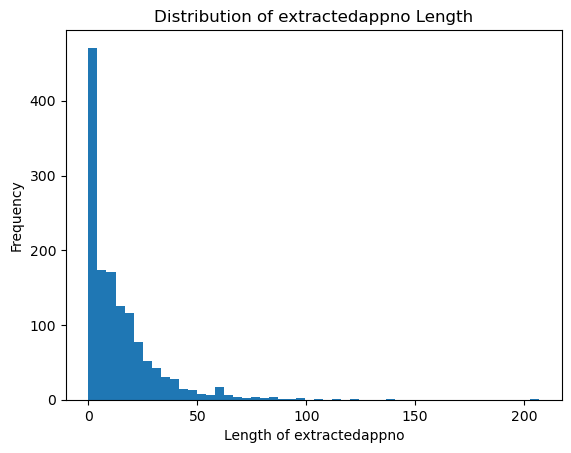

In [51]:
new['extractedapplen'].plot(kind='hist', bins=50)

plt.xlabel('Length of extractedappno')
plt.ylabel('Frequency')
plt.title('Distribution of extractedappno Length')

plt.show()

In [53]:
new[new['importance_x'] != new['importance_y']][['importance_x','importance_y']]

,importance_x,importance_y
377,3,4
1120,3,4


In [54]:
new.columns

Index(['Filename_x', 'Questions', 'Subject Matter', 'appno', 'source_file',
       'doc_date', 'importance_x', 'keywords_art_3', 'keywords_art_3_text',
       'Subj_Count', 'Filename_y', 'doctypebranch', 'respondent',
       'decisiondate', 'extractedappno', 'conclusion', 'importance_y',
       'kpthesaurus', 'judgementdate', 'doctype', 'kpdate', 'resolutiondate',
       'application', 'article', 'referencedate', 'publishedby', 'violation',
       'advopidentifier', 'nonviolation', 'separateopinion',
       'documentcollectionid2', 'isplaceholder', 'languagenumber',
       'typedescription', 'originatingbody', 'representedby',
       'introductiondate', 'reportdate', 'issue', 'meetingnumber',
       'languageisocode', 'externalsources', 'applicability',
       'resolutionnumber', 'appnoparts', 'scl', 'advopstatus', 'docname',
       'rulesofcourt', 'documentcollectionid', 'ecli', 'sclappnos', 'rank',
       'extractedappno_list', 'extractedapplen'],
      dtype='object')

In [55]:
new = new[['Filename_x','Questions','Subject Matter','appno','source_file','doc_date','importance_x','keywords_art_3','keywords_art_3_text','Subj_Count','extractedappno','extractedappno_list','extractedapplen']]

In [56]:
new.rename(columns={'Filename_x':'Filename','importance_x':'importance'}, inplace=True)

In [57]:
new

,Filename,Questions,Subject Matter,appno,source_file,doc_date,importance,keywords_art_3,keywords_art_3_text,Subj_Count,extractedappno,extractedappno_list,extractedapplen
0,001-109309,1. In the light of the applicants’ claims and ...,"The applicants, M.M., his wife and a minor chi...",72861/11,pruned_ADMISSIBILITY_meta.json,2013-09-03,4,[350],(Art. 3) Prohibition of torture,912,72861/11;30696/09;57264/09,"[30696/09, 57264/09]",2
1,001-109387,Has there been a violation of Article 3 of the...,"1. The applicant, Mr Sergiu Buhaniuc, is a Mol...",56074/10,pruned_CHAMBER_meta.json,2014-01-28,4,"[350, 90, 596, 193]","(Art. 3) Prohibition of torture, (Art. 3) Degr...",784,56074/10;18919/10;25803/94;26973/95;77617/01;4...,"[18919/10, 25803/94, 26973/95, 77617/01, 42066...",11
2,001-109429,1. In the light of the applicant’s claims and ...,The applicant is a national of the Democratic ...,75972/11,pruned_ADMISSIBILITYCOM_meta.json,2014-10-14,4,[350],(Art. 3) Prohibition of torture,479,75972/11,[],0
3,001-109439,1. Taking into account the applicant’s medical...,"The applicant, Mr Telman Akopovich Mkhitaryan,...",46108/11,pruned_CHAMBER_meta.json,2013-02-05,4,"[350, 90, 193]","(Art. 3) Prohibition of torture, (Art. 3) Degr...",3400,46108/11;61767/08;26772/95;7842/04;2346/02;302...,"[61767/08, 26772/95, 7842/04, 2346/02, 30210/9...",33
4,001-109440,1. Did the applicant exhaust domestic remedies...,"The applicant, Mr Nikolay Nikolayevich Ryazano...",44885/06,pruned_ADMISSIBILITYCOM_meta.json,2021-10-19,4,[350],(Art. 3) Prohibition of torture,3957,44885/06;1750/03;34636/09;13074/07;29462/95;21...,"[1750/03, 34636/09, 13074/07, 29462/95, 21566/...",12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1369,001-225422,1. Have the applicants been subjected to inhum...,The application concerns the applicant’s ill-t...,54009/21,pruned_ADMISSIBILITYCOM_meta.json,2023-10-12,4,[350],(Art. 3) Prohibition of torture,148,54009/21,[],0
1370,001-225813,1. Has the applicant been subjected to inhuman...,The application concerns an incident that occu...,34039/22,pruned_ADMISSIBILITYCOM_meta.json,2024-02-15,4,[350],(Art. 3) Prohibition of torture,180,34039/22,[],0
1371,001-226519,Was the confinement of the applicant to a rest...,The application concerns the applicant’s confi...,26597/23,pruned_ADMISSIBILITYCOM_meta.json,2024-04-04,4,[350],(Art. 3) Prohibition of torture,90,26597/23,[],0
1372,001-227690,1. Did the material conditions of the applican...,The application concerns the conditions of det...,22144/23,pruned_ADMISSIBILITYCOM_meta.json,2024-04-04,4,[350],(Art. 3) Prohibition of torture,274,22144/23,[],0


In [58]:
pd.to_pickle(new, '/users/sgdbareh/volatile/ECHR_Importance/Art_3_Data_Process/comm_cases_with_metadata.pkl')

### Outcome Cases

In [19]:
data_directory = '/users/sgdbareh/volatile/ECHR_Importance/Art_3_Data/corpora/article3'

In [20]:
list_files = []

for folder in os.listdir(data_directory):

    subfolder = data_directory + '/' + folder

    for file in os.listdir(subfolder):
        list_files.append(subfolder+'/'+file)

In [21]:
facts_list = []
law_list = []

for file in list_files:
    
    if file.split('/')[-1] == 'fact_section':
        for text_file in os.listdir(file):
            with open(file + '/' + text_file,'r') as text:
                data = [text_file, text.read()]
            facts_list.append(data)

    else:
        for text_file in os.listdir(file):
            with open(file + '/' + text_file,'r') as text:
                data = [text_file, text.read()]
            law_list.append(data)


In [25]:
facts_df = pd.DataFrame(facts_list,columns=['Filename','Facts'])
law_df = pd.DataFrame(law_list,columns=['Filename','The Law'])

In [26]:
facts_df['Filename'] = facts_df['Filename'].str.replace('.txt', '')
law_df['Filename'] = law_df['Filename'].str.replace('.txt', '')
facts_df['Facts'] = facts_df['Facts'].str.strip()
law_df['The Law'] = law_df['The Law'].str.strip()
facts_df['Facts'] = facts_df['Facts'].str.replace('\n', '')
law_df['The Law'] = law_df['The Law'].str.replace('\n', '')

In [27]:
facts_df['Word Count'] = facts_df['Facts'].str.split().str.len()

<Axes: ylabel='Frequency'>

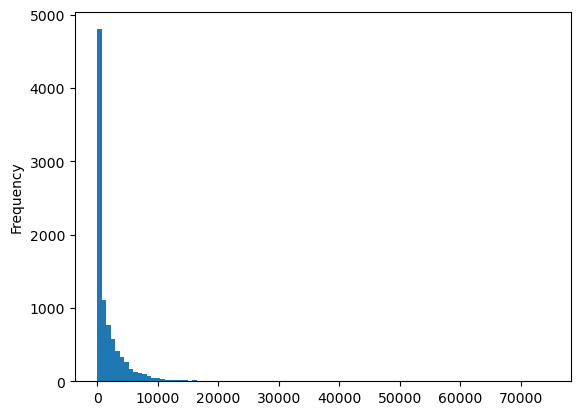

In [28]:
facts_df['Word Count'].plot(kind='hist',bins=100)

In [29]:
df_merged = pd.merge(facts_df, law_df, on='Filename',how='inner')

In [30]:
df_merged = df_merged[df_merged['Word Count'] >=60]

In [31]:
df_merged['date'] = df_merged['Filename'].str.split('_').str[0]
df_merged['File'] = df_merged['Filename'].str.split('_').str[1]

In [32]:
df_merged['date'] = pd.to_datetime(df_merged['date'], format='%Y-%m-%d')

In [77]:
df_merged = df_merged[df_merged['date'] >= '1995-01-01']

In [78]:
df_merged

,Filename,Facts,Word Count,The Law,date,File
28,1997-12-09_001-67704,"The applicant, born in 1956, is a Turkish citi...",272,1. The applicant complains under Article 5 par...,1997-12-09,001-67704
29,1998-12-01_001-4840,The applicant is a British citizen born in 195...,850,1. The applicant complains that the reviews by...,1998-12-01,001-4840
30,1998-12-01_001-4894,The applicant is a British citizen born in 196...,2233,The applicant complains that he has not been a...,1998-12-01,001-4894
31,1998-12-08_001-4497,"The applicant, born in 1955, is a citizen of S...",803,The applicant complains under Article 3 of the...,1998-12-08,001-4497
32,1999-01-19_001-4507,"The applicant, born in 1974, is a citizen of M...",935,1. The applicant complains that his deportatio...,1999-01-19,001-4507
...,...,...,...,...,...,...
9101,2021-12-07_001-214330,10. The applicant was born in 1985 and now res...,12338,ALLEGED VIOLATION OF ARTICLE 3 OF THE CONVENTI...,2021-12-07,001-214330
9102,2022-04-29_001-217061,THE CIRCUMSTANCES OF THE CASE11. The applicant...,10107,ALLEGED VIOLATION OF ARTICLE 3 OF THE CONVENTI...,2022-04-29,001-217061
9103,2022-11-03_001-220484,"THE CIRCUMSTANCES OF THE CASE6. The applicant,...",6764,ALLEGED VIOLATION OF ARTICLE 3 OF THE CONVENTI...,2022-11-03,001-220484
9104,2023-04-28_001-224629,1. The case originated in an application (no. ...,1131,Legal Framework12. Article 38 of the Conventio...,2023-04-28,001-224629


In [14]:
import os

In [56]:
metadata = pd.DataFrame(columns=['itemid','appno','doctypebranch','respondent','decisiondate','extractedappno','conclusion','importance','kpthesaurus','judgementdate'])

#doctypebranch = admissibility etc
#respondent = country
#appno = application number
#item_id = unique id
#decisiondate = date of decision
#judgementdate = date of judgement
#extractedappno = citations (need to exclude actual appno/s of case)
#conclusion = outcome
#importance = importance
#kpthesaurus = keywords

for file in os.listdir('/users/sgdbareh/volatile/ECHR_Importance/raw_case_metadata'):

    if file.endswith('.json'):
        with open('/users/sgdbareh/volatile/ECHR_Importance/raw_case_metadata' + '/' + file) as f:
            data = pd.read_json(f,lines=True)

        metadata = pd.concat([metadata,data])

                

In [57]:
metadata.reset_index(drop=True,inplace=True)

In [58]:
metadata

,itemid,appno,doctypebranch,respondent,decisiondate,extractedappno,conclusion,importance,kpthesaurus,judgementdate,...,resolutionnumber,appnoparts,scl,advopstatus,docname,rulesofcourt,documentcollectionid,ecli,sclappnos,rank
0,001-235252,63403/13,ADMISSIBILITY,UKR,09/07/2024 00:00:00,63403/13;40450/04;46852/13;32317/10;75025/01;2...,Inadmissible,4,609;649;14,,...,,63403;13,,None,"ZOLOTYY MANDARYN OYL, TOV v. UKRAINE",,CASELAW;DECISIONS;ADMISSIBILITY;ENG,ECLI:CE:ECHR:2024:0709DEC006340313,None,479.88290
1,001-235279,55657/09,ADMISSIBILITY,TUR,25/06/2024 00:00:00,55657/09;18369/07;44827/08;651/10;5286/10;4800...,Struck out of the list,4,445;609;649,,...,,55657;09,,None,ÇELEBİ v. TÜRKİYE,,CASELAW;DECISIONS;ADMISSIBILITY;ENG,ECLI:CE:ECHR:2024:0625DEC005565709,None,336.34628
2,001-235206,14179/21,ADMISSIBILITY,MLT,18/06/2024 00:00:00,14179/21;38358/22;47152/06;10865/09;32250/08;1...,Inadmissible,4,445;444;343;14,,...,,14179;21,,None,CASSAR v. MALTA,,CASELAW;DECISIONS;ADMISSIBILITY;ENG,ECLI:CE:ECHR:2024:0618DEC001417921,None,301.29172
3,001-235122,1106/13,ADMISSIBILITY,ARM,11/06/2024 00:00:00,1106/13;17153/11;21881/20;71243/01;38433/09,Inadmissible,4,369;14,,...,,1106;13,,None,MUSEYAN v. ARMENIA,,CASELAW;DECISIONS;ADMISSIBILITY;ENG,ECLI:CE:ECHR:2024:0611DEC000110613,None,276.45060
4,001-235004,41678/20,ADMISSIBILITY,UKR,04/06/2024 00:00:00,41678/20;8019/16;38677/06;54904/08;6582/16;449...,Inadmissible (Art. 35) Admissibility criteria;...,3,14;398;183;498;369;311,,...,,41678;20,"Anheuser-Busch Inc. v. Portugal [GC], no. 7304...",None,FUTORNYAK v. UKRAINE,,CASELAW;DECISIONS;ADMISSIBILITY;ENG,ECLI:CE:ECHR:2024:0604DEC004167820,73049/01;53080/13;38677/06;20701/09;7975/06;44...,258.39807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66509,001-58296,33440/96,GRANDCHAMBER,ITA,,33440/96;34884/97;34256/96;35284/97;35265/97,Violation of Art. 6-1;Pecuniary damage - claim...,4,445;40;406;216,28/07/1999 00:00:00,...,,33440;96,"Salesi v. Italy judgment of 26 February 1993, ...",,CASE OF FERRARI v. ITALY,,CASELAW;JUDGMENTS;GRANDCHAMBER;ENG,ECLI:CE:ECHR:1999:0728JUD003344096,,143.00891
66510,001-58258,33124/96,GRANDCHAMBER,NLD,,33124/96,Struck out of the list (Article 37-1 - Strikin...,4,449;350;620;609;478;138;165;561,22/06/1999 00:00:00,...,,33124;96,Soering v. the United Kingdom judgment of 7 Ju...,,CASE OF ABDURRAHIM INCEDURSUN v. THE NETHERLANDS,,CASELAW;JUDGMENTS;GRANDCHAMBER;ENG,ECLI:CE:ECHR:1999:0622JUD003312496,14038/88,143.00590
66511,001-58255,14025/88,GRANDCHAMBER,ITA,,14025/88,Pecuniary damage - financial award;Non-pecunia...,4,216;369,16/06/1999 00:00:00,...,,14025;88,"Musial v. Poland judgment of 25 March 1999, § ...",,CASE OF ZUBANI v. ITALY (ARTICLE 41),,CASELAW;JUDGMENTS;GRANDCHAMBER;ENG,ECLI:CE:ECHR:1999:0616JUD001402588,,143.00540
66512,001-58211,24436/94;24582/94;24583/94;24584/94;24895/94;2...,GRANDCHAMBER,GBR,,24436/94;24582/94;24583/94;24584/94;24895/94;2...,Violation of Art. 6-1;Pecuniary damage - claim...,4,445;180;181;216,18/02/1999 00:00:00,...,,24436;94;24582;94;24583;94;24584;94;24895;94;2...,Findlay v. the United Kingdom judgment of 25 F...,,CASE OF CABLE AND OTHERS v. THE UNITED KINGDOM,,CASELAW;JUDGMENTS;GRANDCHAMBER;ENG,ECLI:CE:ECHR:1999:0218JUD002443694,,142.99571


In [59]:
pd.to_pickle(metadata,'/users/sgdbareh/volatile/ECHR_Importance/Art_3_Data_Process/unfiltered_metadata.pkl')

In [17]:
filtered_metadata = metadata.iloc[:, :10]

In [18]:
filtered_metadata['judgementdate'] =  pd.to_datetime(filtered_metadata['judgementdate'],format='%d/%m/%Y %H:%M:%S').dt.date
filtered_metadata['decisiondate'] =  pd.to_datetime(filtered_metadata['decisiondate'],format='%d/%m/%Y %H:%M:%S').dt.date

In [19]:
filtered_metadata['decisiondate'] = pd.to_datetime(filtered_metadata['decisiondate'])
filtered_metadata['judgementdate'] = pd.to_datetime(filtered_metadata['judgementdate'])

In [20]:
filtered_df = filtered_metadata[(filtered_metadata['decisiondate'].dt.date.notnull()) & (filtered_metadata['judgementdate'].dt.date.notnull())]
filtered_df

,itemid,appno,doctypebranch,respondent,decisiondate,extractedappno,conclusion,importance,kpthesaurus,judgementdate
7202,001-81897,21085/02,ADMISSIBILITY,TUR,2006-06-22,21085/02,Partly inadmissible,4,350;444;448;445;440,2007-04-12
9898,001-71906,63378/00,ADMISSIBILITY,RUS,2003-04-29,63378/00;44558/98,Partly admissible;Partly inadmissible,4,350;448;445,2005-01-20
36064,001-70377,24919/03,CHAMBER,NLD,2005-09-08,24919/03;25498/94;37040/02;46827/99;46951/99;2...,Violation of Art. 3 (certain aspects);No viola...,1,183;498;350;193;216,2005-09-29
36074,001-69672,36220/97,CHAMBER,TUR,2002-01-17,36220/97;1998/80;1998/81;1999/68;2001/72;2001/...,Violation of Art. 6-1;Non-pecuniary damage - f...,1,445;7;41;101;113;406;441;216,2005-07-12
36076,001-69614,2345/02,CHAMBER,NLD,2004-10-05,2345/02;45276/99;38865/02;39652/98;40035/98;67...,Violation of Art. 3;No separate issue under Ar...,1,350;90;193;492;216;449,2005-07-05
...,...,...,...,...,...,...,...,...,...,...
66430,001-72934,64897/01,GRANDCHAMBER,ITA,2003-11-20,64897/01;28114/95;62361/00;64699/01;64705/01;6...,Preliminary objection dismissed (Article 35-1 ...,2,445;40;7;406;183;498;14;128;216;577;283,2006-03-29
66431,001-72932,64705/01,GRANDCHAMBER,ITA,2003-11-20,64705/01;62361/00;64886/01;64699/01;64890/01;6...,Preliminary objection dismissed (Article 35-1 ...,2,445;40;7;406;183;498;14;128;216;577;283,2006-03-29
66432,001-72936,65102/01,GRANDCHAMBER,ITA,2003-11-18,65102/01;62361/00;64699/01;64705/01;64886/01;6...,Preliminary objection dismissed (Article 35-1 ...,2,445;40;7;406;183;498;14;128;216;577;283,2006-03-29
66433,001-72933,65075/01,GRANDCHAMBER,ITA,2003-11-20,65075/01;62361/00;64699/01;64705/01;64890/01;6...,Preliminary objection dismissed (Article 35-1 ...,2,445;40;7;406;183;498;14;128;216;577;283,2006-03-29


In [21]:
filtered_metadata['judgementdate'] = filtered_metadata['judgementdate'].fillna(filtered_metadata['decisiondate'])

In [22]:
filtered_metadata.drop(['decisiondate'],axis=1,inplace=True)

In [23]:
filtered_metadata.rename(columns={'itemid':'File'},inplace=True)

In [24]:
filtered_metadata.drop_duplicates(subset='File', keep=False, inplace=True)

In [25]:
filtered_metadata = filtered_metadata[filtered_metadata['judgementdate'] >= '1995-01-01']

In [26]:
filtered_metadata

,File,appno,doctypebranch,respondent,extractedappno,conclusion,importance,kpthesaurus,judgementdate
0,001-235252,63403/13,ADMISSIBILITY,UKR,63403/13;40450/04;46852/13;32317/10;75025/01;2...,Inadmissible,4,609;649;14,2024-07-09
1,001-235279,55657/09,ADMISSIBILITY,TUR,55657/09;18369/07;44827/08;651/10;5286/10;4800...,Struck out of the list,4,445;609;649,2024-06-25
2,001-235206,14179/21,ADMISSIBILITY,MLT,14179/21;38358/22;47152/06;10865/09;32250/08;1...,Inadmissible,4,445;444;343;14,2024-06-18
3,001-235122,1106/13,ADMISSIBILITY,ARM,1106/13;17153/11;21881/20;71243/01;38433/09,Inadmissible,4,369;14,2024-06-11
4,001-235004,41678/20,ADMISSIBILITY,UKR,41678/20;8019/16;38677/06;54904/08;6582/16;449...,Inadmissible (Art. 35) Admissibility criteria;...,3,14;398;183;498;369;311,2024-06-04
...,...,...,...,...,...,...,...,...,...
66509,001-58296,33440/96,GRANDCHAMBER,ITA,33440/96;34884/97;34256/96;35284/97;35265/97,Violation of Art. 6-1;Pecuniary damage - claim...,4,445;40;406;216,1999-07-28
66510,001-58258,33124/96,GRANDCHAMBER,NLD,33124/96,Struck out of the list (Article 37-1 - Strikin...,4,449;350;620;609;478;138;165;561,1999-06-22
66511,001-58255,14025/88,GRANDCHAMBER,ITA,14025/88,Pecuniary damage - financial award;Non-pecunia...,4,216;369,1999-06-16
66512,001-58211,24436/94;24582/94;24583/94;24584/94;24895/94;2...,GRANDCHAMBER,GBR,24436/94;24582/94;24583/94;24584/94;24895/94;2...,Violation of Art. 6-1;Pecuniary damage - claim...,4,445;180;181;216,1999-02-18


In [27]:
pd.to_pickle(filtered_metadata,'/users/sgdbareh/volatile/ECHR_Importance/Art_3_Data_Process/filtered_metadata.pkl')

In [46]:
#merge two dataframes

In [79]:
full_outcome_data = pd.merge(df_merged,filtered_metadata,on='File',how='inner')

In [80]:
full_outcome_data.drop(['Filename','judgementdate'],axis=1,inplace=True)

In [83]:
full_outcome_data

,Facts,Word Count,The Law,date,File,appno,doctypebranch,respondent,extractedappno,conclusion,importance,kpthesaurus
0,"The applicant, born in 1956, is a Turkish citi...",272,1. The applicant complains under Article 5 par...,1997-12-09,001-67704,31859/96,ADMISSIBILITY,TUR,31859/96;22761/93;24722/94;1994/95,Inadmissible,4,448;45;350
1,The applicant is a British citizen born in 195...,850,1. The applicant complains that the reviews by...,1998-12-01,001-4840,40787/98,ADMISSIBILITY,GBR,40787/98;20448/92;15882/89,Partly inadmissible,4,451;429;203;268;329;376;350
2,The applicant is a British citizen born in 196...,2233,The applicant complains that he has not been a...,1998-12-01,001-4894,32340/96,ADMISSIBILITY,GBR,32340/96,Admissible,4,448;438;45;350;192;90
3,"The applicant, born in 1955, is a citizen of S...",803,The applicant complains under Article 3 of the...,1998-12-08,001-4497,44667/98,ADMISSIBILITY,DEU,44667/98,Inadmissible,4,14;128;350;193
4,"The applicant, born in 1974, is a citizen of M...",935,1. The applicant complains that his deportatio...,1999-01-19,001-4507,42367/98,ADMISSIBILITY,SWE,42367/98,Inadmissible,3,350;492;193;90;192;89
...,...,...,...,...,...,...,...,...,...,...,...,...
7666,10. The applicant was born in 1985 and now res...,12338,ALLEGED VIOLATION OF ARTICLE 3 OF THE CONVENTI...,2021-12-07,001-214330,57467/15,GRANDCHAMBER,DNK,57467/15;578/16;353/16;41738/10;17299/12;26565...,No violation of Article 3 - Prohibition of tor...,1,350;620;451;628;429;268;329;333;216;577;283;23...
7667,THE CIRCUMSTANCES OF THE CASE11. The applicant...,10107,ALLEGED VIOLATION OF ARTICLE 3 OF THE CONVENTI...,2022-04-29,001-217061,28492/15;49975/15,GRANDCHAMBER,RUS,28492/15;49975/15;77658/11;49747/11;71386/10;2...,No violation of Article 3 - Prohibition of tor...,1,350;618
7668,"THE CIRCUMSTANCES OF THE CASE6. The applicant,...",6764,ALLEGED VIOLATION OF ARTICLE 3 OF THE CONVENTI...,2022-11-03,001-220484,22854/20,GRANDCHAMBER,GBR,22854/20;140/10;66069/09;9146/07;32650/07;2190...,Struck out of the list (Art. 37) Striking out ...,1,350;89;618;192;609;478
7669,1. The case originated in an application (no. ...,1131,Legal Framework12. Article 38 of the Conventio...,2023-04-28,001-224629,38263/08,GRANDCHAMBER,RUS,38263/08;59532/00;10865/09;40792/10;8019/16;13...,Non-pecuniary damage - award (Article 41 - Non...,1,216;283;577;121;594;26;126;449;595;231;496;350...


In [94]:
full_outcome_data = full_outcome_data[full_outcome_data['kpthesaurus'] != '']

In [97]:
#check all cases are Article 3
full_outcome_data = full_outcome_data[full_outcome_data['kpthesaurus'].apply(lambda x: any(keyword in x for keyword in article3))]
full_outcome_data

,Facts,Word Count,The Law,date,File,appno,doctypebranch,respondent,extractedappno,conclusion,importance,kpthesaurus
0,"The applicant, born in 1956, is a Turkish citi...",272,1. The applicant complains under Article 5 par...,1997-12-09,001-67704,31859/96,ADMISSIBILITY,TUR,31859/96;22761/93;24722/94;1994/95,Inadmissible,4,448;45;350
1,The applicant is a British citizen born in 195...,850,1. The applicant complains that the reviews by...,1998-12-01,001-4840,40787/98,ADMISSIBILITY,GBR,40787/98;20448/92;15882/89,Partly inadmissible,4,451;429;203;268;329;376;350
2,The applicant is a British citizen born in 196...,2233,The applicant complains that he has not been a...,1998-12-01,001-4894,32340/96,ADMISSIBILITY,GBR,32340/96,Admissible,4,448;438;45;350;192;90
3,"The applicant, born in 1955, is a citizen of S...",803,The applicant complains under Article 3 of the...,1998-12-08,001-4497,44667/98,ADMISSIBILITY,DEU,44667/98,Inadmissible,4,14;128;350;193
4,"The applicant, born in 1974, is a citizen of M...",935,1. The applicant complains that his deportatio...,1999-01-19,001-4507,42367/98,ADMISSIBILITY,SWE,42367/98,Inadmissible,3,350;492;193;90;192;89
...,...,...,...,...,...,...,...,...,...,...,...,...
7666,10. The applicant was born in 1985 and now res...,12338,ALLEGED VIOLATION OF ARTICLE 3 OF THE CONVENTI...,2021-12-07,001-214330,57467/15,GRANDCHAMBER,DNK,57467/15;578/16;353/16;41738/10;17299/12;26565...,No violation of Article 3 - Prohibition of tor...,1,350;620;451;628;429;268;329;333;216;577;283;23...
7667,THE CIRCUMSTANCES OF THE CASE11. The applicant...,10107,ALLEGED VIOLATION OF ARTICLE 3 OF THE CONVENTI...,2022-04-29,001-217061,28492/15;49975/15,GRANDCHAMBER,RUS,28492/15;49975/15;77658/11;49747/11;71386/10;2...,No violation of Article 3 - Prohibition of tor...,1,350;618
7668,"THE CIRCUMSTANCES OF THE CASE6. The applicant,...",6764,ALLEGED VIOLATION OF ARTICLE 3 OF THE CONVENTI...,2022-11-03,001-220484,22854/20,GRANDCHAMBER,GBR,22854/20;140/10;66069/09;9146/07;32650/07;2190...,Struck out of the list (Art. 37) Striking out ...,1,350;89;618;192;609;478
7669,1. The case originated in an application (no. ...,1131,Legal Framework12. Article 38 of the Conventio...,2023-04-28,001-224629,38263/08,GRANDCHAMBER,RUS,38263/08;59532/00;10865/09;40792/10;8019/16;13...,Non-pecuniary damage - award (Article 41 - Non...,1,216;283;577;121;594;26;126;449;595;231;496;350...


In [98]:
full_outcome_data.columns

Index(['Facts', 'Word Count', 'The Law', 'date', 'File', 'appno',
       'doctypebranch', 'respondent', 'extractedappno', 'conclusion',
       'importance', 'kpthesaurus'],
      dtype='object')

### Split Data

In [65]:
data = pd.read_pickle('/users/sgdbareh/volatile/ECHR_Importance/Art_3_Data_Process/comm_cases_with_metadata_processed.pkl')


In [66]:
valid_data = data.sample(50,random_state=42)

In [67]:
test_data = data.drop(valid_data.index)

In [69]:
pd.to_pickle(valid_data,'/users/sgdbareh/volatile/ECHR_Importance/Art_3_Data_Process/comm_cases_valid.pkl')

In [70]:
pd.to_pickle(test_data,'/users/sgdbareh/volatile/ECHR_Importance/Art_3_Data_Process/comm_cases_test.pkl')

In [68]:
valid_data

,Filename,Questions,Subject Matter,appno,source_file,doc_date,importance,keywords_art_3,keywords_art_3_text,Subj_Count,new_list_length,extracted_apps,new_list_length_2
430,001-127198,"1. In respect of the below complaints, have th...",A list of the applicants is set out in the app...,43985/13,pruned_ADMISSIBILITY_meta.json,2014-09-16,4,[350],(Art. 3) Prohibition of torture,3718,19,"[27765/09, 55352/12, 25389/05, 43844/98, 30696...",13
588,001-146023,1. Having regard to the cumulative effect of t...,"The applicant, Mr Artur Dejnek, is a Polish na...",62395/12,pruned_ADMISSIBILITYCOM_meta.json,2015-09-22,4,[350],(Art. 3) Prohibition of torture,509,3,"[20071/07, 13621/08]",2
296,001-117458,1. Has the applicant been subjected on 1 Novem...,"The applicant, Mr Andrey Petrovich Portnyagin,...",44071/06,pruned_COMMITTEE_meta.json,2021-10-19,4,"[350, 90, 193]","(Art. 3) Prohibition of torture, (Art. 3) Degr...",1575,2,"[54810/00, 72250/01]",2
184,001-114053,1. Has the applicant been subjected to inhuman...,"The applicant, Mr Andrey Mikhaylovich Sokovnin...",3627/07,pruned_COMMITTEE_meta.json,2019-03-05,4,"[350, 90, 596, 193]","(Art. 3) Prohibition of torture, (Art. 3) Degr...",1943,16,"[74266/01, 152/04, 61701/11, 46956/09, 23380/0...",8
244,001-115508,1. Has the applicant exhausted domestic remedi...,"1. The applicant, Mr Krzysztof Wojciechowski, ...",55446/09,pruned_ADMISSIBILITYCOM_meta.json,2014-01-14,4,[350],(Art. 3) Prohibition of torture,650,0,[],0
590,001-146025,Having regard to the cumulative effect of the ...,"The applicant, Mr Dariusz Karwowski, is a Poli...",29869/13,pruned_CHAMBER_meta.json,2016-04-19,4,"[350, 90]","(Art. 3) Prohibition of torture, (Art. 3) Degr...",310,3,"[20071/07, 13621/08, 30873/96]",3
78,001-111071,Having regard to the procedural protection fro...,"The applicant, Mr Vasile Colesnic, is a Moldov...",3312/11,pruned_ADMISSIBILITYCOM_meta.json,2013-10-01,4,[350],(Art. 3) Prohibition of torture,578,0,[],0
708,001-152953,1. Has the applicant exhausted effective domes...,"The applicant, Ms Katarzyna Skrzek, is a Polis...",20026/12,pruned_ADMISSIBILITYCOM_meta.json,2016-08-30,4,[350],(Art. 3) Prohibition of torture,1319,8,[],0
411,001-126505,1. Was the applicant subjected to treatment in...,"1. The applicant, Mr Marcus Johannes Maria Wie...",49111/08,pruned_ADMISSIBILITY_meta.json,2014-11-04,4,[350],(Art. 3) Prohibition of torture,4414,5,"[7511/13, 24760/94, 39630/09, 26307/95]",4
43,001-110353,"1. Was the applicant informed, in a language w...","The applicant, Mr Z.H., is a Hungarian nationa...",28973/11,pruned_CHAMBER_meta.json,2012-11-08,3,"[350, 90, 193]","(Art. 3) Prohibition of torture, (Art. 3) Degr...",341,9,"[46857/06, 28524/95, 25803/94, 29392/95, 33394...",5
